# DATA ANALYSIS OF GOOGLE PLAY STORE APPS RATING 

## Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                          
import matplotlib.pyplot as plt
%matplotlib inline

## Read data 

In [2]:
google_data = pd.read_csv("googleplaystore.csv") #Storing the data in 'google_data' variable

In [3]:
google_data.head()  #display the first five rows of 'google_data' dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
 google_data.shape #to check the size of the dataset, use 'shape' attribute. in google_data we have 1048 rows and 13 columns 

(10841, 13)

In [5]:
google_data.describe() #Summary Statistics (count , mean , std, min ,interquartile ranges 25% , median(50%), 75% , max)

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


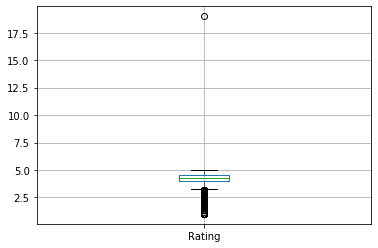

In [6]:
google_data.boxplot() #create boxplot( by default it create boxplot of 'rating' ). In below plot we can clearly see that of most of the data lie between 2.5 to 5 and having outlier over between 17.5 to 19

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC89FB8D0>]],
      dtype=object)

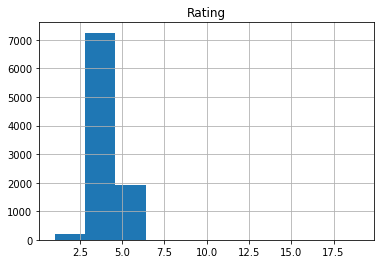

In [7]:
google_data.hist() #create the histrogram of 'google_data' . it semms like 'right skewed graph'

In [8]:
google_data.info() #'info' provide the some important informaion of columns like non-null(not missing) and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning  

#### Count the numbers of missing values in dataframe 

In [9]:
google_data.isnull() #'isnull' is the boolean function return 'True' if that value is missing and 'False' when there is non missing value 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
google_data.isnull().sum() #return the total sum of the missing values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Checking  how many ratings are more than 5 - outliers

In [11]:
google_data[google_data.Rating > 5 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
google_data.drop([10472], inplace = True) #remove the outlier from the dataset. for permanent change is dataset use 'inplace = True' 

In [13]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


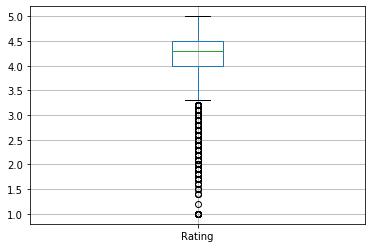

In [14]:
google_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC8A67080>]],
      dtype=object)

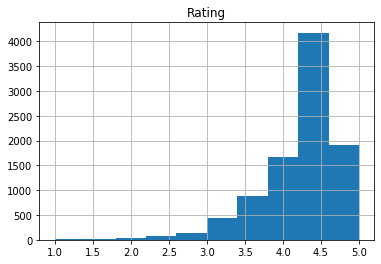

In [15]:
google_data.hist()

### Remove Columns that are 90% Empty  

In [16]:
threshold = len(google_data) * 0.1
threshold

1084.0

In [17]:
google_data.dropna(thresh = threshold ,  axis = 1, inplace= True )

In [18]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null object
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [19]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Data Imputation and Manipulation 

#####  Fill the null values with appropriate values using aggregate function such as mean,median or mode

In [20]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [21]:
#using median for numerical data which is "Rating" in this dataset
google_data.Rating =google_data['Rating'].transform(impute_median)

In [22]:
#mode of categorical values
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [23]:
#fill the misiing categorical values with mode
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace =True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]), inplace =True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]), inplace =True)

In [24]:
#count the number of null values in each column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
#Convert Price , Review and Installs into Numerical Values
google_data["Price"] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
google_data["Price"] = google_data['Price'].apply(lambda x: float(x))
google_data["Reviews"] = pd.to_numeric(google_data["Reviews"], errors ='coerce')

In [26]:
google_data["Installs"] = google_data["Installs"].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data["Installs"] = google_data["Installs"].apply(lambda x: str(x).replace(',' , '') if ',' in str(x) else str(x) )
google_data["Installs"] = google_data["Installs"].apply(lambda x: float(x))

In [27]:
google_data.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [28]:
google_data.describe() #Summary Status after cleaning . Now its return 4 column

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Data Visulization

In [29]:
#Grouping The Apps According To Rating , Price , Reviews
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

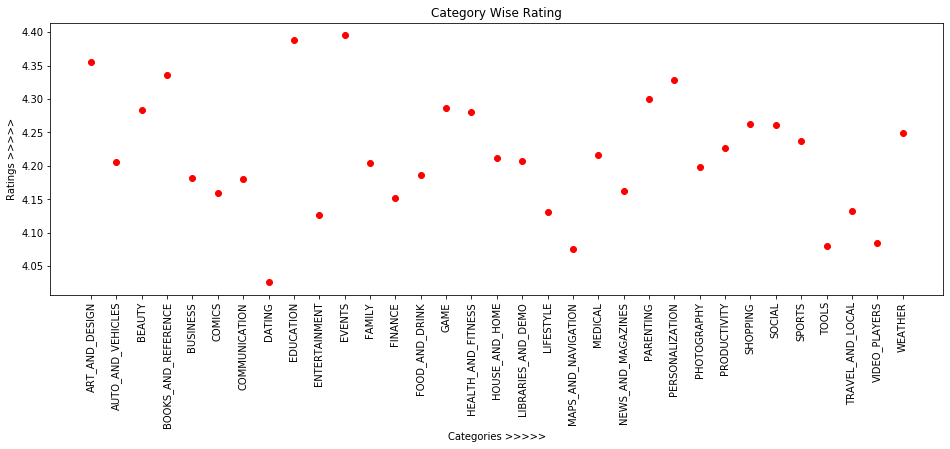

In [30]:
#Plot the Grapgh Between Category & Rating   
plt.figure(figsize= (16,5))
plt.plot(x ,'ro',color ='r')
plt.xticks(rotation = 90)
plt.title("Category Wise Rating")
plt.xlabel("Categories >>>>>")
plt.ylabel("Ratings >>>>>")
plt.show()

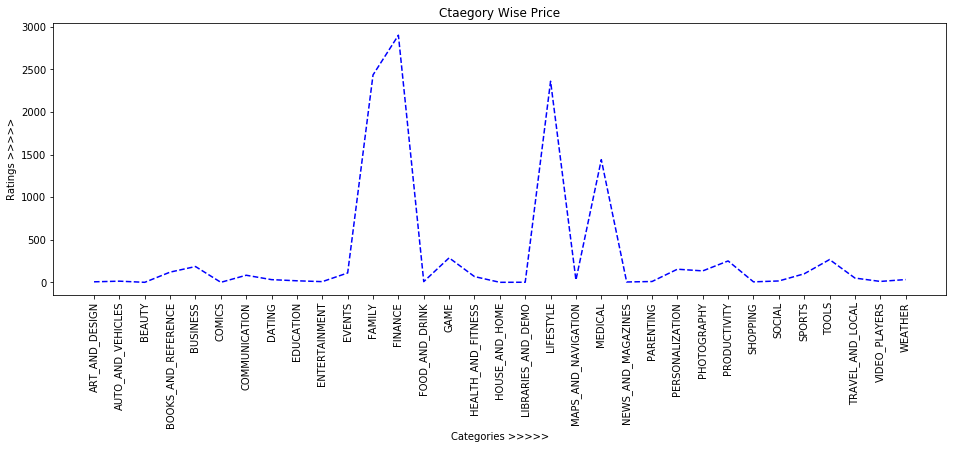

In [31]:
#Plot The Graph Between Category and Price
plt.figure(figsize= (16,5))
plt.plot(y ,'r--',color ='b')
plt.xticks(rotation = 90)
plt.title("Ctaegory Wise Price")
plt.xlabel("Categories >>>>>")
plt.ylabel("Ratings >>>>>")
plt.show()

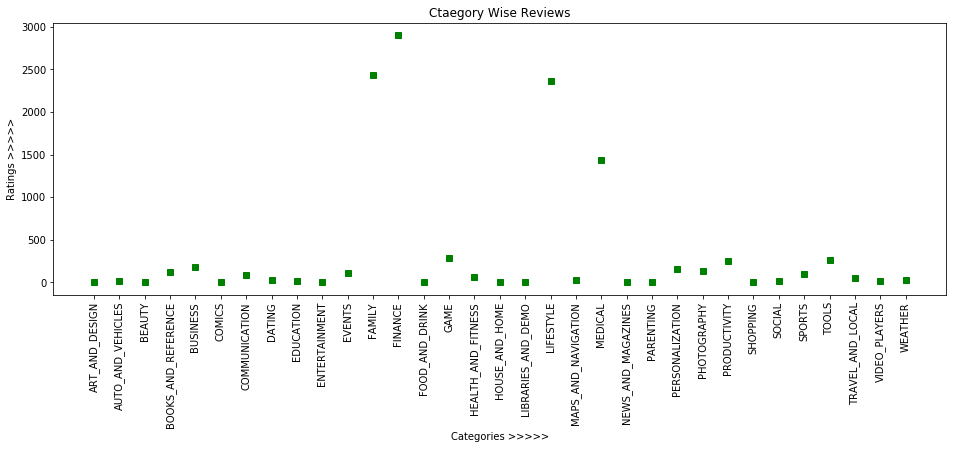

In [32]:
#Plot The Graph Between Category and Reviews
plt.figure(figsize= (16,5))
plt.plot(y ,'bs',color ='g')
plt.xticks(rotation = 90)
plt.title("Ctaegory Wise Reviews")
plt.xlabel("Categories >>>>>")
plt.ylabel("Ratings >>>>>")
plt.show()

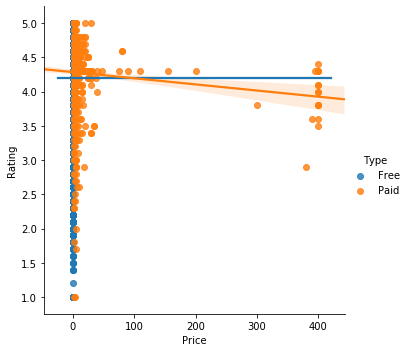

In [33]:
##Ctreate the 2D Scatter Plot Between Price and Ratting
sns.lmplot(x = 'Price' , y = 'Rating' , data=google_data, fit_reg =True , hue = 'Type')

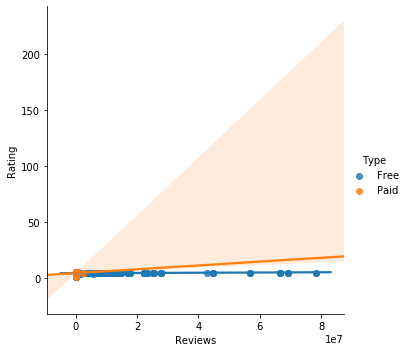

In [34]:
##Ctreate the 2D Scatter Plot Between Reviews and Ratting
sns.lmplot(x = 'Reviews' , y = 'Rating' , data=google_data, fit_reg =True , hue = 'Type')

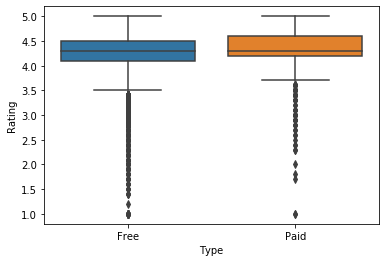

In [36]:
#Create Boxplot Plot between Type and Rating 
sns.boxplot(x='Type',y='Rating', data = google_data)

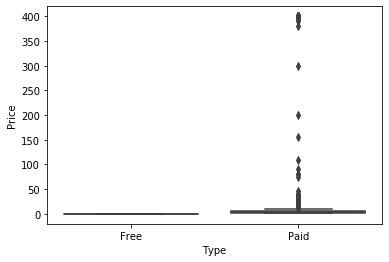

In [38]:
#Create Boxplot Plot between Type and Reviews 
sns.boxplot(x='Type',y='Price', data = google_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

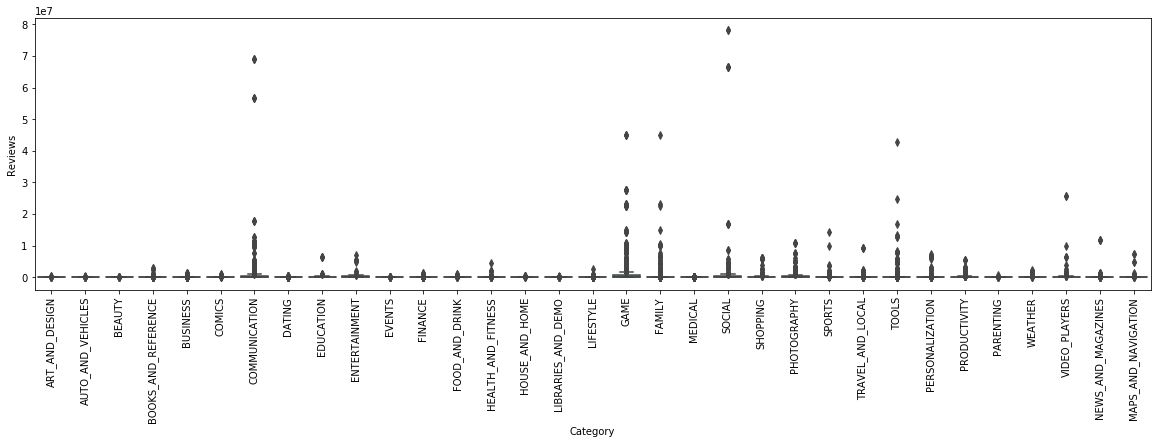

In [65]:
#Create Boxplot Plot between Type and Reviews 
plt.figure(figsize =(20,5))
sns.boxplot(x='Category',y='Reviews', data = google_data)
plt.xticks(rotation = 90)

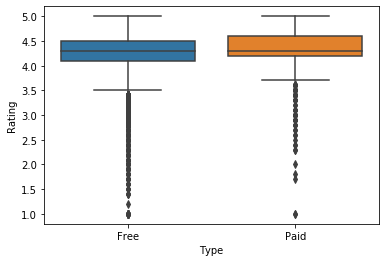

In [62]:
#Create Boxplot Plot between Type and Reviews 
sns.boxplot(x='Type',y='Rating', data = google_data)

Text(0.5, 1.0, 'Histogram of Rating')

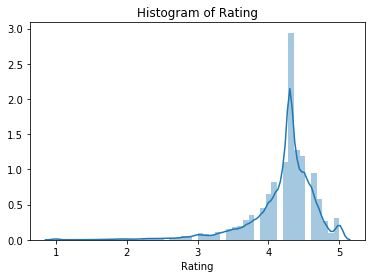

In [53]:
#Create Histogram of Rating 
sns.distplot(google_data['Rating']).set_title("Histogram of Rating")

Text(0.5, 1.0, 'Histogram of Price')

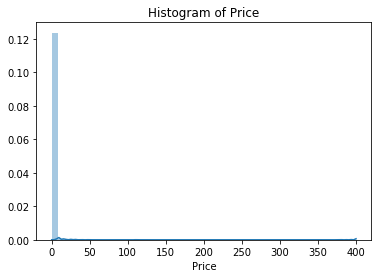

In [54]:
#Create Histogram of Rating 
sns.distplot(google_data['Price']).set_title("Histogram of Price")

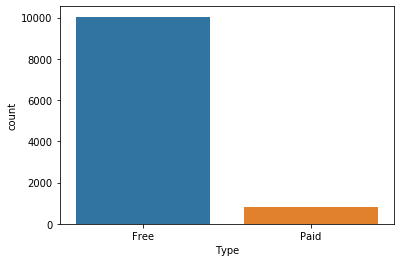

In [56]:
#Create Countplot of Price
sns.countplot(x='Type', data =google_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

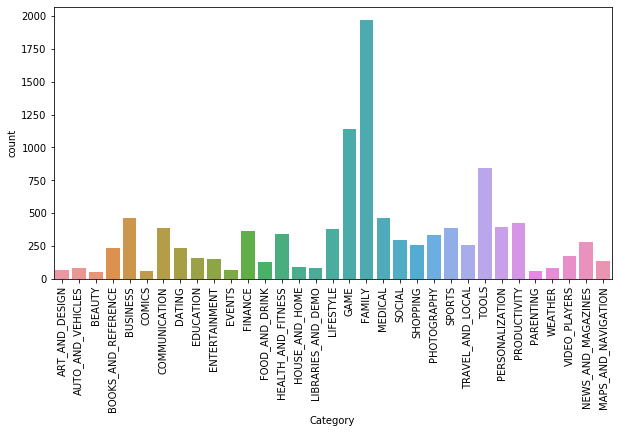

In [68]:
#Create Countplot of Category
plt.figure(figsize = (10,5))
sns.countplot(x='Category', data =google_data)
plt.xticks(rotation = 90)